In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
results_1 = pickle.load(open("individual_results_1.pkl", "rb"))
results_2 = pickle.load(open("individual_results_2.pkl", "rb"))
results_3 = pickle.load(open("individual_results_3.pkl", "rb"))
results_4 = pickle.load(open("individual_results_4.pkl", "rb"))
results_5 = pickle.load(open("individual_results_5.pkl", "rb"))
results_6 = pickle.load(open("individual_results_6.pkl", "rb"))
results_7 = pickle.load(open("individual_results_7.pkl", "rb"))
results_8 = pickle.load(open("individual_results_8.pkl", "rb"))
results_9 = pickle.load(open("individual_results_9.pkl", "rb"))
results_12 = pickle.load(open("individual_results_12.pkl", "rb"))
results_13 = pickle.load(open("individual_results_13.pkl", "rb"))

In [23]:
results_all = [results_1, results_2, results_3, results_4, 
               results_5, results_6, results_7, results_8, 
               results_9, results_12, results_13]

In [5]:
def average_participant_results(results, k_folds=3):
    
    acc = 0
    f_score = 0
    conf_mat = np.zeros((3,3), dtype="int")
    
    for i in range(k_folds):
        acc += results["cv{}_accuracy".format(i)]
        f_score += results["cv{}_f_score".format(i)]
       
        # dealing with different size confusion matrices / shouldn't be larger than 3,3
        cm = np.array(results["cv{}_conf_mat".format(i)], dtype="int")
        idx_y = cm.shape[0] - cm.shape[0]
        idx_x = cm.shape[1] - cm.shape[1]
        cm[:-idx_y or None, :-idx_x or None] += cm
        
    return acc / k_folds, f_score / k_folds, cm


In [6]:
def average_experiment_results(results, participants, k_folds=3):
    
    exp_acc = 0
    exp_f = 0
    exp_cm = np.zeros((3,3), dtype="int")
    
    for p in participants:
        acc, f_score, cm = average_participant_results(results[p], k_folds)
        exp_acc += acc
        exp_f += f_score
        
        diff_x = (exp_cm.shape[1] - cm.shape[1]) * -1
        diff_y = (exp_cm.shape[0] - cm.shape[0]) * -1
        exp_cm[:diff_y or None,:diff_x or None] += cm
        
    return exp_acc / len(participants), exp_f / len(participants), exp_cm

In [9]:
acc, f_score, conf_mat = average_participant_results(results_6["p3"])

In [10]:
print(acc)
print(f_score)
print(conf_mat)

0.970180619757
0.965720356615
[[2522   18    0]
 [  80  878    0]
 [   0   22    0]]


In [11]:
participants = ["p1", "p3", "p4", "p6"]
acc, f_score, conf_mat = average_experiment_results(results_6, participants)

In [12]:
print(acc)
print(f_score)
print(conf_mat)

0.93829315996
0.933390288168
[[11804   408   116]
 [  380  2914     4]
 [  184    22   460]]


In [13]:
accs, fs, cms = [], [], []
for r in results_all:
    exp_accs, exp_fs, exp_cms = [], [], []
    
    for p in participants:
        acc, f_score, cm = average_participant_results(r[p])
        
        exp_accs.append(acc)
        exp_fs.append(f_score)
        exp_cms.append(cm)
        
    accs.append(exp_accs)
    fs.append(exp_fs)
    cms.append(exp_cms)
    
accs = np.array(accs)
fs = np.array(fs)
cms = np.array(cms)

l = len(accs)

<Container object of 11 artists>

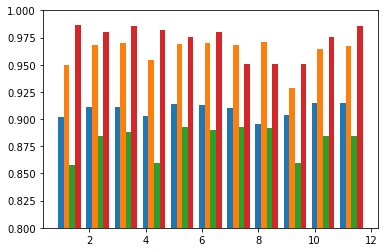

In [14]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx+width*0, accs[:,0], width)
plt.bar(idx+width*1, accs[:,1], width)
plt.bar(idx+width*2, accs[:,2], width)
plt.bar(idx+width*3, accs[:,3], width)

<Container object of 11 artists>

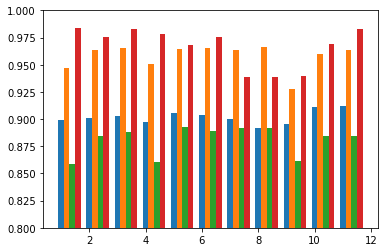

In [15]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx+width*0, fs[:,0], width)
plt.bar(idx+width*1, fs[:,1], width)
plt.bar(idx+width*2, fs[:,2], width)
plt.bar(idx+width*3, fs[:,3], width)

<Container object of 11 artists>

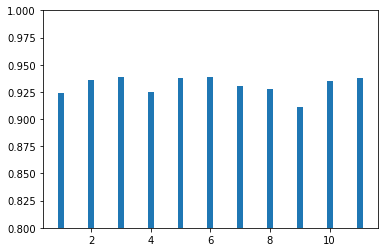

In [24]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx, np.average(accs, axis=1), width)

<Container object of 11 artists>

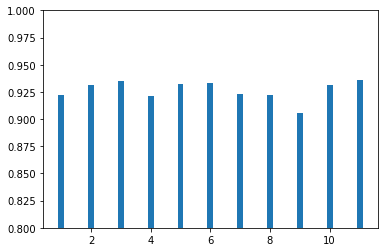

In [17]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx, np.average(fs, axis=1), width)

[[3836    2  236]
 [  72   46    4]
 [ 102    0  502]]
[[2514   26    0]
 [  78  880    0]
 [   0   22    0]]
[[1294  324]
 [ 134 1968]]
[[4084    2    0]
 [  42   98    0]
 [  34    0    0]]


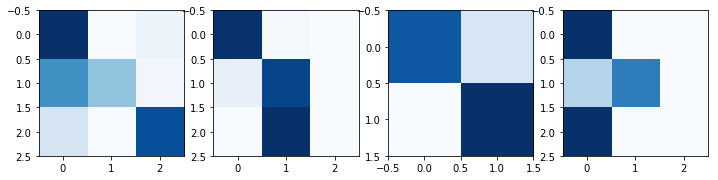

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(141)
for i, cm in enumerate(cms[10]):

    print(cm)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.subplot(1, 4, i+1)
    plt.imshow(cm, cmap="Blues")
    
plt.show()

[[3898    2  174]
 [  72   46    4]
 [ 126    0  478]]
[[2528   12    0]
 [ 114  844    0]
 [   0   22    0]]
[[1270  348]
 [ 140 1962]]
[[4084    2    0]
 [  88   52    0]
 [  34    0    0]]


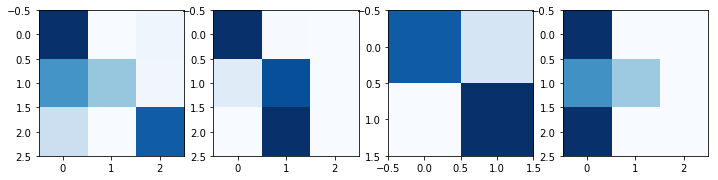

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(141)
for i, cm in enumerate(cms[9]):

    print(cm)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.subplot(1, 4, i+1)
    plt.imshow(cm, cmap="Blues")
    
plt.show()